# Modeling compressive strength of concrete

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Download data from https://www.kaggle.com/niteshyadav3103/concrete-compressive-strength
Please rename the file because `pandas` doesn't like spaces in file names.

In [4]:
df = pd.read_csv('./ConcreteCompressiveStrength.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Familiarize yourself with the data using `df.describe()`

In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Do a few scatter plots `plt.scatter(df.iloc[:,0],df.iloc[:,8])`

Notice that some factors appear to be appropriate for regression while others are not.

Setup "Concrete compressive strength" as output vector `y` using `df.iloc[...]` 

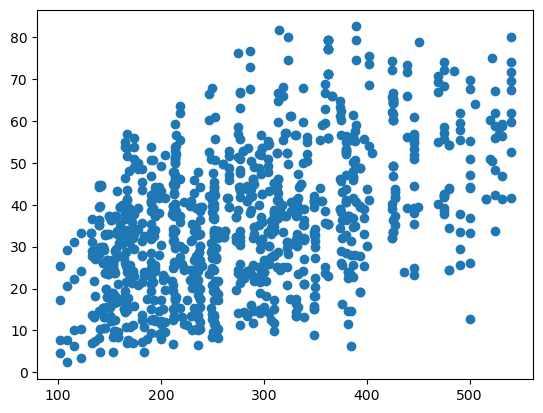

In [7]:
plt.scatter(df.iloc[:,0],df.iloc[:,8])
plt.show()

In [8]:
y = np.array(df.iloc[:,8]).reshape(-1,1)

Setup all the other factors as input matrix `X`using `df.ilo[...]`

In [9]:
X = np.array(df.iloc[:,[0,1,2,3,4,5,6,7]])

Do a train-test split on the data

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

Train the model and report training score and test score

In [13]:
model = LinearRegression().fit(x_train,y_train)
model.score(x_train,y_train)
model.score(x_test,y_test)

0.6312547629288834

### Task: how do we know which factors are important?

Use `statsmodel`

In [14]:
import statsmodels.api as sm
X = sm.add_constant(X)
modols = sm.OLS(y, X)
results = modols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          6.76e-206
Time:                        10:19:50   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.1638     26.588     -0.871      0.3

Look at the confidence intervals.  Reflect and discuss

In [15]:
results.conf_int()

array([[-7.53379521e+01,  2.90104404e+01],
       [ 1.03126652e-01,  1.36443858e-01],
       [ 8.39570522e-02,  1.23737446e-01],
       [ 6.32474385e-02,  1.12638725e-01],
       [-2.29141260e-01, -7.14545483e-02],
       [ 1.07291546e-01,  4.74082341e-01],
       [-4.03984164e-04,  3.64643514e-02],
       [-8.47323135e-04,  4.11562345e-02],
       [ 1.03575303e-01,  1.24875937e-01]])

Question: How do you interpret the low confidence in the intercept?

In [16]:
np.cov(X)

array([[148817.375     , 150257.0625    , 114306.79166667, ...,
        117812.30833333, 130091.30208333, 120124.86458333],
       [150257.0625    , 151721.75      , 115533.45833333, ...,
        119007.07916667, 131459.26041667, 121265.82291667],
       [114306.79166667, 115533.45833333,  97845.38194444, ...,
         97225.24097222, 108495.19305556,  96555.13472222],
       ...,
       [117812.30833333, 119007.07916667,  97225.24097222, ...,
        113739.93861111, 123201.54777778, 109783.74111111],
       [130091.30208333, 131459.26041667, 108495.19305556, ...,
        123201.54777778, 135635.63944444, 119196.42902778],
       [120124.86458333, 121265.82291667,  96555.13472222, ...,
        109783.74111111, 119196.42902778, 107858.62111111]])

Can we learn from the correlation matrix?

<Axes: >

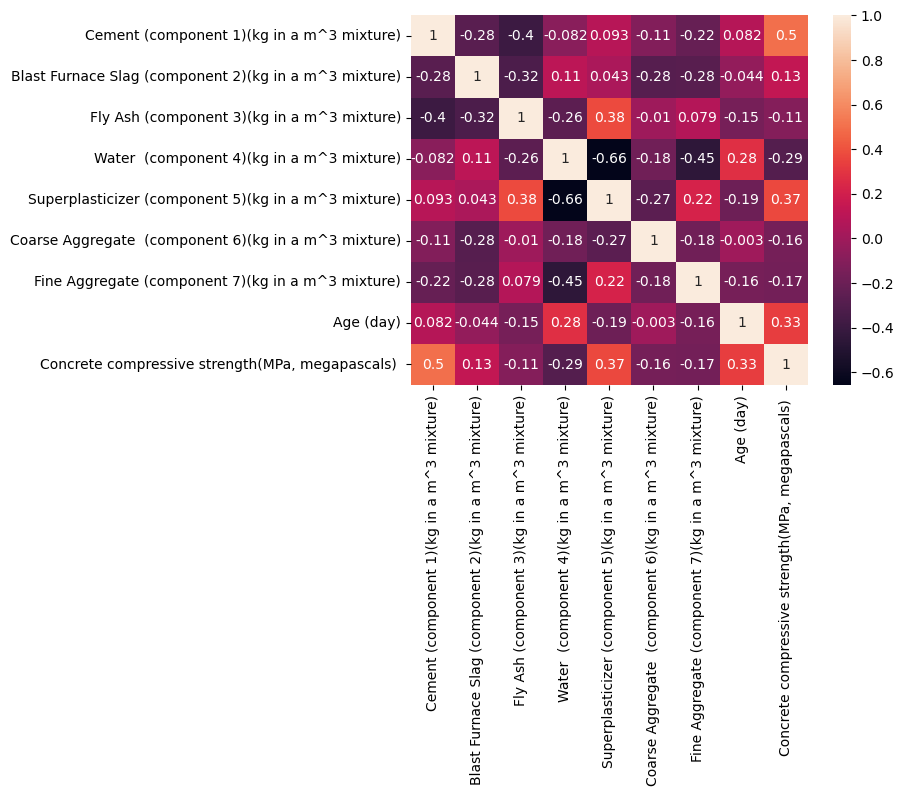

In [17]:
sns.heatmap(df.corr(), annot=True)

## Your turn

Use `sklearn` `SequentialFeatureSelector` to see which feature variables are important.  Try with 4 features to select.  Then rerun linear model with those 4 features.  Do both forward and backward selection to see which is better.

In [18]:
feature_names = df.columns[0:8]
X = np.array(df.iloc[:,[0,1,2,3,4,5,6,7]])

In [19]:
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector

In [20]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=4, direction="forward"
).fit(X, y)

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=4, direction="backward"
).fit(X, y)

Use `sfs_forward.get_support()` to see which features are selected

In [23]:
sfs_forward.get_support()
feature_names[[0,3,4,7]]

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

Get the names of the selected factors using `feature_names[...]`

**Your Turn:** Now check what backward selection chooses

In [25]:
sfs_backward.get_support()
feature_names[[0,1,3,7]]

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [ ]:
##

See how much accuracy is lost if you only use features selected by forward selection

In [ ]:
##

See how much accuracy is lost if you only use features selected by backward selection